## Prediction of T-shirts demand
------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from matplotlib.ticker import PercentFormatter

import importlib
import utils
importlib.reload(utils)

sns.set_theme(style="whitegrid")
data_init = pd.read_csv("./t-shirts.csv")

X_COLUMNS = data_init.columns[:-1]

### 1. Data exploratin

In [2]:
data_init.info()
data_init.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [3]:
data_init.describe(include="all") 

,size,material,color,sleeves,demand
count,20000,20000,20000,20000,20000
unique,7,5,10,2,3
top,L,nylon,white,long,high
freq,4408,5652,3286,10117,8965


#### Pareto charts

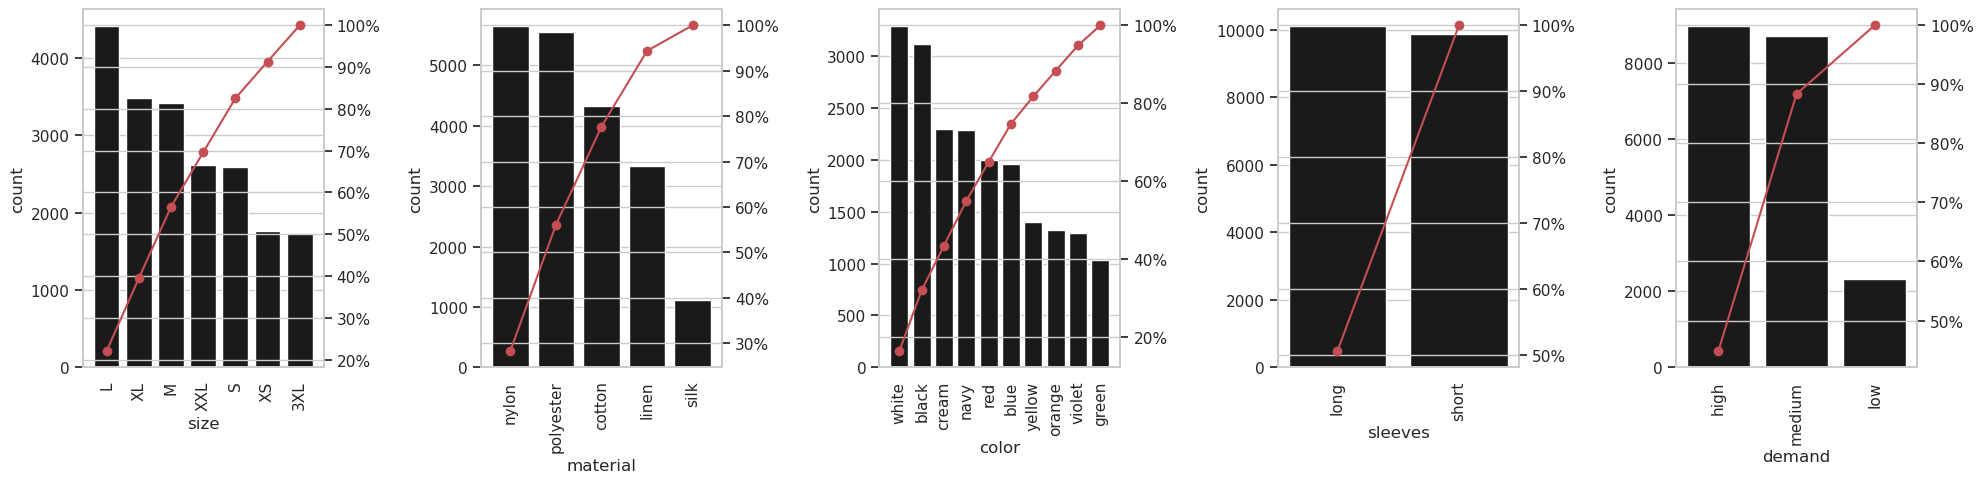

In [4]:
columns = iter(data_init.columns)
n = len(data_init.columns)
f, axs = plt.subplots(1,n, figsize=(20,5))

for ax in axs:
    column = next(columns)
    plot_data = data_init[[column]].groupby(column)[column].count().sort_values(ascending=False).reset_index(name='count')
    sns.barplot(x=column, y='count', data=plot_data, color=(.1, .1, .1, 1), ax=ax)
    
    pareto_line = plot_data['count'].cumsum()/plot_data['count'].sum()*100
    ax_pareto = ax.twinx()
    ax_pareto.yaxis.set_major_formatter(PercentFormatter())
    ax_pareto.plot(plot_data[column], pareto_line, color='r', marker='o', linestyle='-')
       
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [5]:
X, Y = data_init[X_COLUMNS], data_init[['demand']]

x_dummies = pd.get_dummies(X, drop_first=True, dtype=np.int64)
x_dummies # kolejność

,size_L,size_M,size_S,size_XL,size_XS,size_XXL,material_linen,material_nylon,material_polyester,material_silk,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow,sleeves_short
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
19996,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19997,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
19998,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


#### PCA 

In [6]:
from sklearn.preprocessing import StandardScaler, Normalizer

x = x_dummies
def normalize(x):
  return Normalizer().fit_transform(x)

def standarize(x):
  return StandardScaler().fit_transform(x)


In [21]:
from sklearn.decomposition import PCA

def apply_pca(x):  
  pca = PCA(n_components=0.95)
  x = pca.fit_transform(x)

  # print("Number of features before:", x_dummies.shape[1], " after:", x.shape[1])
  # print(pca.explained_variance_ratio_)

  # explaied_variace_sum = np.cumsum(pca.explained_variance_ratio_)
  # plt.plot(range(1, len(explaied_variace_sum)+1), explaied_variace_sum)
  # plt.title('Explained variance by number of components in PCA')
  # plt.xlabel('Number of components')
  # plt.ylabel('Explained variance')
  # plt.show()
  return x


In [8]:
from sklearn.model_selection import train_test_split

def split_data(x):
  # stratify to maintain class proportions
  X_train, X_test, y_train, y_test = train_test_split(x, Y.values.reshape(-1), test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [9]:
import utils
import importlib
importlib.reload(utils)

def prepare_plots(evaluate_model):
  utils.print_md('###' + evaluate_model.__doc__)

  #### Normalization and standarization ####
  utils.print_md('#### Impact of normalization and standarization')

  utils.print_md('##### without normalization and standarization')
  x_with = x
  evaluate_model(x_with)

  utils.print_md('##### Standarized')
  x_with = x
  x_with = standarize(x_with)
  evaluate_model(x_with)

  utils.print_md('##### Normalized')
  x_with = x
  x_with = normalize(x_with)
  evaluate_model(x_with)

  utils.print_md('##### Normalized, then standardized')
  x_with = x
  x_with = normalize(x_with)
  x_with = standarize(x_with)
  evaluate_model(x_with)

  utils.print_md('##### Standarized, then normalized')
  x_with = x
  x_with = standarize(x_with)
  x_with = normalize(x_with)
  evaluate_model(x_with)

  #### PCA ####
  utils.print_md('#### Impact of PCA')

  utils.print_md('##### with PCA without normalization and standarization')
  x_with = x
  x_with = apply_pca(x_with)
  evaluate_model(x_with)

  utils.print_md('##### Standarized and normalized with PCA')
  x_with = x
  x_with = standarize(x_with)
  x_with = normalize(x_with)
  x_with = apply_pca(x_with)
  evaluate_model(x_with)

  utils.print_md('##### Normalized, then standardized with PCA')
  x_with = x
  x_with = normalize(x_with)
  x_with = standarize(x_with)
  x_with = apply_pca(x_with)
  evaluate_model(x_with)

###Gaussian Naive Bayes

#### Impact of normalization and standarization

##### without normalization and standarization

Accuracy: 0.50275 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1803      |         0         |        0        |
| Actual: Medium |      259       |        183        |       15        |
|  Actual: High  |      1701      |        14         |       25        |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.479   |  1.0   |  0.648   | 1803.0  |
|     low      |   0.929   |  0.4   |   0.56   |  457.0  |
|    medium    |   0.625   | 0.014  |  0.028   | 1740.0  |
|   accuracy   |   0.503   | 0.503  |  0.503   |  0.503  |
|  macr

##### Standarized

Accuracy: 0.49975 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1803      |         0         |        0        |
| Actual: Medium |      271       |        171        |       15        |
|  Actual: High  |      1701      |        14         |       25        |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.478   |  1.0   |  0.646   | 1803.0  |
|     low      |   0.924   | 0.374  |  0.533   |  457.0  |
|    medium    |   0.625   | 0.014  |  0.028   | 1740.0  |
|   accuracy   |    0.5    |  0.5   |   0.5    |   0.5   |
|  macr

##### Normalized

Accuracy: 0.5085 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1803      |         0         |        0        |
| Actual: Medium |      234       |        214        |        9        |
|  Actual: High  |      1678      |        45         |       17        |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.485   |  1.0   |  0.653   | 1803.0  |
|     low      |   0.826   | 0.468  |  0.598   |  457.0  |
|    medium    |   0.654   |  0.01  |  0.019   | 1740.0  |
|   accuracy   |   0.508   | 0.508  |  0.508   |  0.508  |
|  macro

##### Normalized, then standardized

Accuracy: 0.50625 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1803      |         0         |        0        |
| Actual: Medium |      243       |        205        |        9        |
|  Actual: High  |      1681      |        42         |       17        |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.484   |  1.0   |  0.652   | 1803.0  |
|     low      |   0.83    | 0.449  |  0.582   |  457.0  |
|    medium    |   0.654   |  0.01  |  0.019   | 1740.0  |
|   accuracy   |   0.506   | 0.506  |  0.506   |  0.506  |
|  macr

##### Standarized, then normalized

Accuracy: 0.61875 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1612      |        104        |       87        |
| Actual: Medium |       64       |        379        |       14        |
|  Actual: High  |      991       |        265        |       484       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.604   | 0.894  |  0.721   | 1803.0  |
|     low      |   0.507   | 0.829  |  0.629   |  457.0  |
|    medium    |   0.827   | 0.278  |  0.416   | 1740.0  |
|   accuracy   |   0.619   | 0.619  |  0.619   |  0.619  |
|  macr

#### Impact of PCA

##### with PCA without normalization and standarization

Number of features before: 20  after: 16


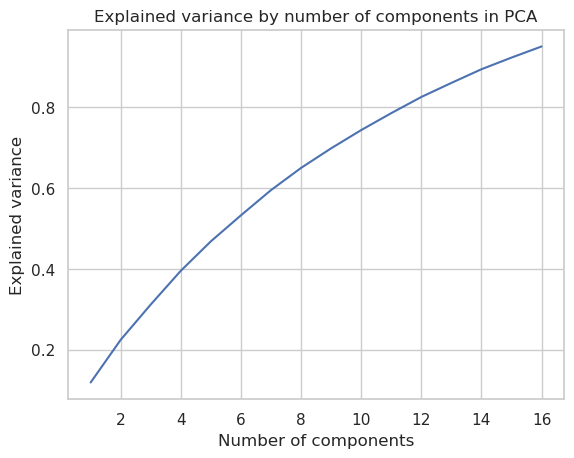

Accuracy: 0.72975 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1455      |        153        |       195       |
| Actual: Medium |       15       |        320        |       122       |
|  Actual: High  |      406       |        190        |      1144       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.776   | 0.807  |  0.791   | 1803.0  |
|     low      |   0.483   |  0.7   |  0.571   |  457.0  |
|    medium    |   0.783   | 0.657  |  0.715   | 1740.0  |
|   accuracy   |   0.73    |  0.73  |   0.73   |  0.73   |
|  macr

##### Standarized and normalized with PCA

Number of features before: 20  after: 17


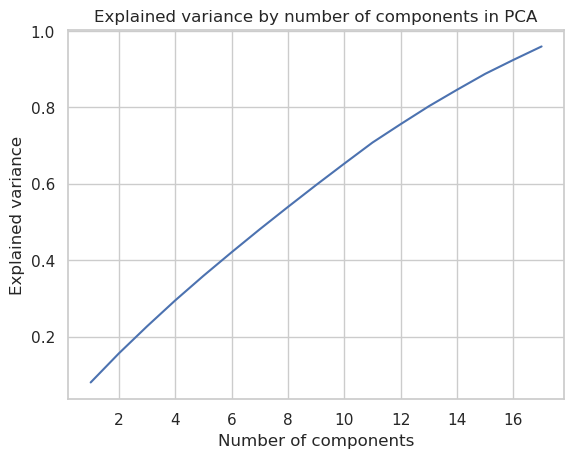

Accuracy: 0.69725 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1535      |        88         |       180       |
| Actual: Medium |       67       |        268        |       122       |
|  Actual: High  |      563       |        191        |       986       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.709   | 0.851  |  0.774   | 1803.0  |
|     low      |   0.49    | 0.586  |  0.534   |  457.0  |
|    medium    |   0.766   | 0.567  |  0.651   | 1740.0  |
|   accuracy   |   0.697   | 0.697  |  0.697   |  0.697  |
|  macr

##### Normalized, then standardized with PCA

Number of features before: 20  after: 17


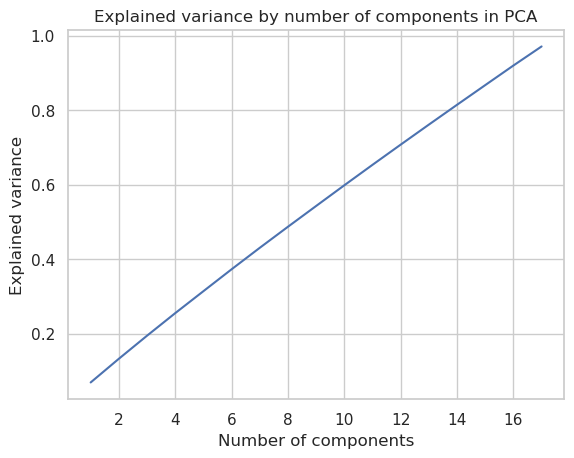

Accuracy: 0.65675 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1312      |        60         |       431       |
| Actual: Medium |       55       |        261        |       141       |
|  Actual: High  |      504       |        182        |      1054       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.701   | 0.728  |  0.714   | 1803.0  |
|     low      |   0.519   | 0.571  |  0.544   |  457.0  |
|    medium    |   0.648   | 0.606  |  0.626   | 1740.0  |
|   accuracy   |   0.657   | 0.657  |  0.657   |  0.657  |
|  macr

In [10]:
from sklearn.naive_bayes import GaussianNB
import utils
import importlib
importlib.reload(utils)

def evaluate_gaussian(x):
  """Gaussian Naive Bayes"""
  X_train, X_test, y_train, y_test = split_data(x)
  model_gaussian = GaussianNB()

  model_gaussian.fit(X_train, y_train)
  y_pred = model_gaussian.predict(X_test)
  utils.evaluate_the_model(y_test, y_pred)

prepare_plots(evaluate_gaussian)


###Decision Tree

#### Impact of normalization and standarization

##### without normalization and standarization

Accuracy: 0.7685 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1663      |         0         |       140       |
| Actual: Medium |       16       |        194        |       247       |
|  Actual: High  |      493       |        30         |      1217       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.766   | 0.922  |  0.837   | 1803.0  |
|     low      |   0.866   | 0.425  |   0.57   |  457.0  |
|    medium    |   0.759   | 0.699  |  0.728   | 1740.0  |
|   accuracy   |   0.768   | 0.768  |  0.768   |  0.768  |
|  macro

##### Standarized

Accuracy: 0.7685 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1663      |         0         |       140       |
| Actual: Medium |       16       |        194        |       247       |
|  Actual: High  |      493       |        30         |      1217       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.766   | 0.922  |  0.837   | 1803.0  |
|     low      |   0.866   | 0.425  |   0.57   |  457.0  |
|    medium    |   0.759   | 0.699  |  0.728   | 1740.0  |
|   accuracy   |   0.768   | 0.768  |  0.768   |  0.768  |
|  macro

##### Normalized

Accuracy: 0.80575 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1639      |         0         |       164       |
| Actual: Medium |       23       |        184        |       250       |
|  Actual: High  |      333       |         7         |      1400       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.822   | 0.909  |  0.863   | 1803.0  |
|     low      |   0.963   | 0.403  |  0.568   |  457.0  |
|    medium    |   0.772   | 0.805  |  0.788   | 1740.0  |
|   accuracy   |   0.806   | 0.806  |  0.806   |  0.806  |
|  macr

##### Normalized, then standardized

Accuracy: 0.80575 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1639      |         0         |       164       |
| Actual: Medium |       23       |        184        |       250       |
|  Actual: High  |      333       |         7         |      1400       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.822   | 0.909  |  0.863   | 1803.0  |
|     low      |   0.963   | 0.403  |  0.568   |  457.0  |
|    medium    |   0.772   | 0.805  |  0.788   | 1740.0  |
|   accuracy   |   0.806   | 0.806  |  0.806   |  0.806  |
|  macr

##### Standarized, then normalized

Accuracy: 0.846 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1532      |         0         |       271       |
| Actual: Medium |       0        |        219        |       238       |
|  Actual: High  |       98       |         9         |      1633       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.94    |  0.85  |  0.893   | 1803.0  |
|     low      |   0.961   | 0.479  |  0.639   |  457.0  |
|    medium    |   0.762   | 0.939  |  0.841   | 1740.0  |
|   accuracy   |   0.846   | 0.846  |  0.846   |  0.846  |
|  macro 

#### Impact of PCA

##### with PCA without normalization and standarization

Number of features before: 20  after: 16


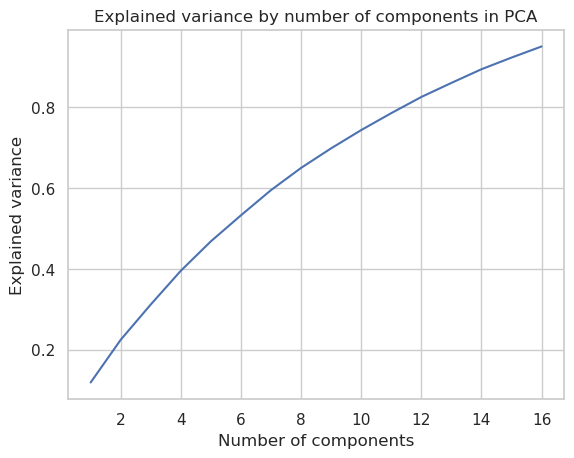

Accuracy: 0.866 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1621      |        79         |       103       |
| Actual: Medium |       0        |        314        |       143       |
|  Actual: High  |      105       |        106        |      1529       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.939   | 0.899  |  0.919   | 1803.0  |
|     low      |   0.629   | 0.687  |  0.657   |  457.0  |
|    medium    |   0.861   | 0.879  |   0.87   | 1740.0  |
|   accuracy   |   0.866   | 0.866  |  0.866   |  0.866  |
|  macro 

##### Standarized and normalized with PCA

Number of features before: 20  after: 17


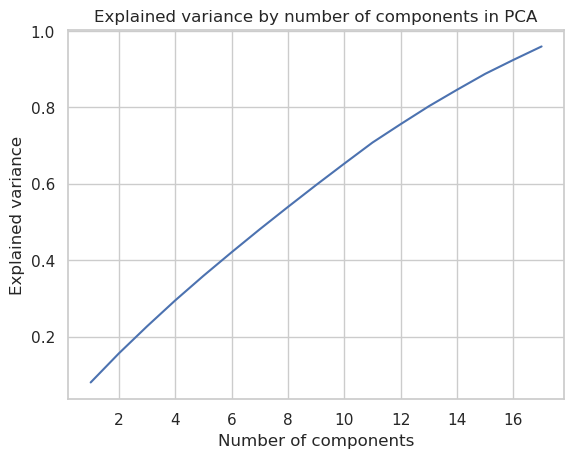

Accuracy: 0.85975 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1520      |         0         |       283       |
| Actual: Medium |       8        |        270        |       179       |
|  Actual: High  |       87       |         4         |      1649       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.941   | 0.843  |  0.889   | 1803.0  |
|     low      |   0.985   | 0.591  |  0.739   |  457.0  |
|    medium    |   0.781   | 0.948  |  0.856   | 1740.0  |
|   accuracy   |   0.86    |  0.86  |   0.86   |  0.86   |
|  macr

##### Normalized, then standardized with PCA

Number of features before: 20  after: 17


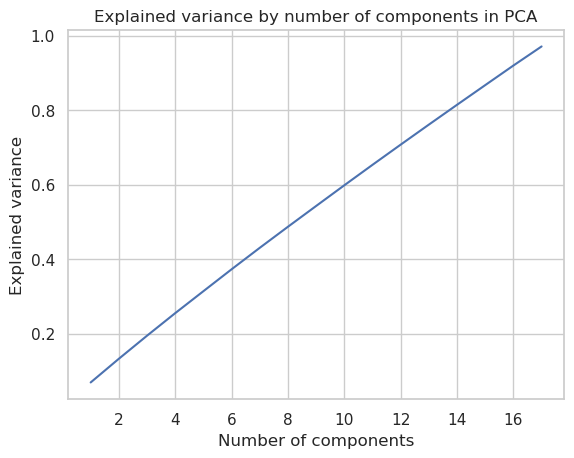

Accuracy: 0.83325 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1597      |        43         |       163       |
| Actual: Medium |       90       |        284        |       83        |
|  Actual: High  |      177       |        111        |      1452       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.857   | 0.886  |  0.871   | 1803.0  |
|     low      |   0.648   | 0.621  |  0.635   |  457.0  |
|    medium    |   0.855   | 0.834  |  0.845   | 1740.0  |
|   accuracy   |   0.833   | 0.833  |  0.833   |  0.833  |
|  macr

In [11]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_decision_tree(x):
  """Decision Tree"""
  X_train, X_test, y_train, y_test = split_data(x)
  model_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

  model_tree.fit(X_train, y_train)
  y_pred = model_tree.predict(X_test)
  utils.evaluate_the_model(y_test, y_pred)
  num_nodes = model_tree.tree_.node_count
  depth = model_tree.tree_.max_depth

  print(f"Number of nodes: {num_nodes}")
  print(f"Depth of tree: {depth}")


prepare_plots(evaluate_decision_tree)


###SVM

#### Impact of normalization and standarization

##### without normalization and standarization

Accuracy: 0.97075 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1772      |         0         |       31        |
| Actual: Medium |       0        |        419        |       38        |
|  Actual: High  |       27       |        21         |      1692       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.985   | 0.983  |  0.984   | 1803.0  |
|     low      |   0.952   | 0.917  |  0.934   |  457.0  |
|    medium    |   0.961   | 0.972  |  0.967   | 1740.0  |
|   accuracy   |   0.971   | 0.971  |  0.971   |  0.971  |
|  macr

##### Standarized

Accuracy: 0.97 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1773      |         0         |       30        |
| Actual: Medium |       0        |        415        |       42        |
|  Actual: High  |       29       |        19         |      1692       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.984   | 0.983  |  0.984   | 1803.0  |
|     low      |   0.956   | 0.908  |  0.932   |  457.0  |
|    medium    |   0.959   | 0.972  |  0.966   | 1740.0  |
|   accuracy   |   0.97    |  0.97  |   0.97   |  0.97   |
|  macro a

##### Normalized

Accuracy: 0.971 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1764      |         0         |       39        |
| Actual: Medium |       0        |        423        |       34        |
|  Actual: High  |       22       |        21         |      1697       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.988   | 0.978  |  0.983   | 1803.0  |
|     low      |   0.953   | 0.926  |  0.939   |  457.0  |
|    medium    |   0.959   | 0.975  |  0.967   | 1740.0  |
|   accuracy   |   0.971   | 0.971  |  0.971   |  0.971  |
|  macro 

##### Normalized, then standardized

Accuracy: 0.971 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1766      |         0         |       37        |
| Actual: Medium |       0        |        417        |       40        |
|  Actual: High  |       23       |        16         |      1701       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.987   | 0.979  |  0.983   | 1803.0  |
|     low      |   0.963   | 0.912  |  0.937   |  457.0  |
|    medium    |   0.957   | 0.978  |  0.967   | 1740.0  |
|   accuracy   |   0.971   | 0.971  |  0.971   |  0.971  |
|  macro 

##### Standarized, then normalized

Accuracy: 0.9725 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1774      |         0         |       29        |
| Actual: Medium |       0        |        424        |       33        |
|  Actual: High  |       29       |        19         |      1692       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.984   | 0.984  |  0.984   | 1803.0  |
|     low      |   0.957   | 0.928  |  0.942   |  457.0  |
|    medium    |   0.965   | 0.972  |  0.969   | 1740.0  |
|   accuracy   |   0.972   | 0.972  |  0.972   |  0.972  |
|  macro

#### Impact of PCA

##### with PCA without normalization and standarization

Number of features before: 20  after: 16


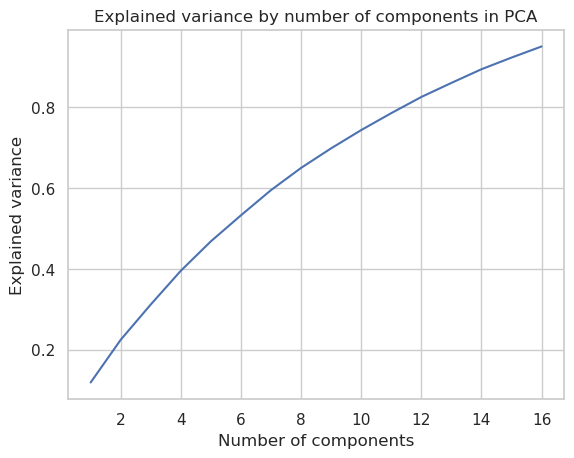

Accuracy: 0.9435 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1706      |         0         |       97        |
| Actual: Medium |       8        |        370        |       79        |
|  Actual: High  |       20       |        22         |      1698       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.984   | 0.946  |  0.965   | 1803.0  |
|     low      |   0.944   |  0.81  |  0.872   |  457.0  |
|    medium    |   0.906   | 0.976  |   0.94   | 1740.0  |
|   accuracy   |   0.944   | 0.944  |  0.944   |  0.944  |
|  macro

##### Standarized and normalized with PCA

Number of features before: 20  after: 17


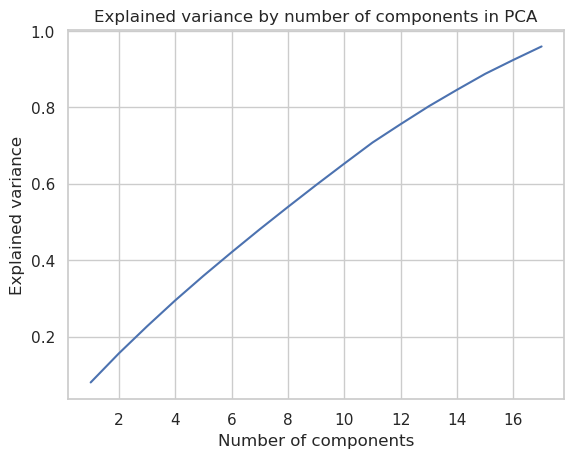

Accuracy: 0.95025 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1780      |         0         |       23        |
| Actual: Medium |       0        |        403        |       54        |
|  Actual: High  |      105       |        17         |      1618       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.944   | 0.987  |  0.965   | 1803.0  |
|     low      |   0.96    | 0.882  |  0.919   |  457.0  |
|    medium    |   0.955   |  0.93  |  0.942   | 1740.0  |
|   accuracy   |   0.95    |  0.95  |   0.95   |  0.95   |
|  macr

##### Normalized, then standardized with PCA

Number of features before: 20  after: 17


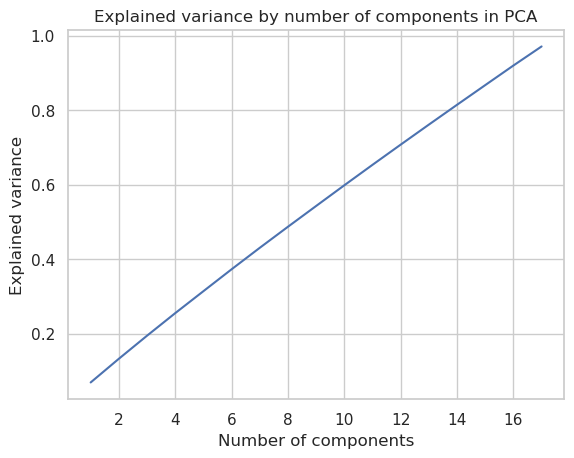

Accuracy: 0.95325 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1769      |         0         |       34        |
| Actual: Medium |       0        |        418        |       39        |
|  Actual: High  |       98       |        16         |      1626       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.948   | 0.981  |  0.964   | 1803.0  |
|     low      |   0.963   | 0.915  |  0.938   |  457.0  |
|    medium    |   0.957   | 0.934  |  0.946   | 1740.0  |
|   accuracy   |   0.953   | 0.953  |  0.953   |  0.953  |
|  macr

In [12]:
from sklearn.svm  import SVC


def evaluate_svm(x):
  """SVM"""
  X_train, X_test, y_train, y_test = split_data(x)
  model_svm = SVC(kernel='rbf', random_state=42)

  model_svm.fit(X_train, y_train)
  y_pred = model_svm.predict(X_test)
  utils.evaluate_the_model(y_test, y_pred)

prepare_plots(evaluate_svm)

In [34]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_decision_tree(model_tree):
  """Decision Tree"""
  x_with = x
  x_with = normalize(x_with)
  x_with = standarize(x_with)
  x_with = apply_pca(x_with)

  X_train, X_test, y_train, y_test = split_data(x_with)
  # utils.print_md('##### Normalized, then standardized with PCA')

  model_tree.fit(X_train, y_train)
  y_pred = model_tree.predict(X_test)
  utils.evaluate_the_model(y_test, y_pred)
  num_nodes = model_tree.tree_.node_count
  depth = model_tree.tree_.max_depth

  print(f"Number of nodes: {num_nodes}")
  print(f"Depth of tree: {depth}")

utils.print_md('##### min_samples_leaf=1')
model_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=1)
evaluate_decision_tree(model_tree)

utils.print_md('##### min_samples_leaf=3')
model_tree = DecisionTreeClassifier(random_state=42,  min_samples_leaf=3)
evaluate_decision_tree(model_tree)

utils.print_md('##### min_samples_leaf=5')
model_tree = DecisionTreeClassifier(random_state=42,  min_samples_leaf=5)
evaluate_decision_tree(model_tree)



##### min_samples_leaf=1

Accuracy: 0.972 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1781      |         0         |       22        |
| Actual: Medium |       0        |        421        |       36        |
|  Actual: High  |       31       |        23         |      1686       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.983   | 0.988  |  0.985   | 1803.0  |
|     low      |   0.948   | 0.921  |  0.935   |  457.0  |
|    medium    |   0.967   | 0.969  |  0.968   | 1740.0  |
|   accuracy   |   0.972   | 0.972  |  0.972   |  0.972  |
|  macro 

##### min_samples_leaf=3

Accuracy: 0.97175 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1781      |         0         |       22        |
| Actual: Medium |       0        |        421        |       36        |
|  Actual: High  |       31       |        24         |      1685       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.983   | 0.988  |  0.985   | 1803.0  |
|     low      |   0.946   | 0.921  |  0.933   |  457.0  |
|    medium    |   0.967   | 0.968  |  0.968   | 1740.0  |
|   accuracy   |   0.972   | 0.972  |  0.972   |  0.972  |
|  macr

##### min_samples_leaf=5

Accuracy: 0.97175 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1781      |         0         |       22        |
| Actual: Medium |       0        |        421        |       36        |
|  Actual: High  |       31       |        24         |      1685       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.983   | 0.988  |  0.985   | 1803.0  |
|     low      |   0.946   | 0.921  |  0.933   |  457.0  |
|    medium    |   0.967   | 0.968  |  0.968   | 1740.0  |
|   accuracy   |   0.972   | 0.972  |  0.972   |  0.972  |
|  macr

In [13]:
# import libsvm
# import libsvm.svm
# import torch.optim as optim
# import torch
# import tqdm
# import torch.nn as nn

# class SVM(nn.Module):
#     def __init__(self, kernel, C, gamma):
#         super().__init__()
#         self.kernel = kernel
#         self.C = C
#         self.gamma = gamma
#         self.model = libsvm.svm.svm_model()

#     def forward(self, x):
#         return self.model(x, self.kernel, self.C, self.gamma)
    
#     def predict(self, x):
#         return libsvm.svm.svm_predict(x, self.model)
    
# utils.print_md('### LIBSVM')
# model_libsvm = SVM(kernel='rbf', C=1, gamma=0.1)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_libsvm.parameters(), lr=0.001)



# n_epochs = 5
# batch_size = 1

# best_acc = - np.inf
# best_weights = None

# for epoch in range(n_epochs):
#     epoch_loss = []
#     epoch_acc = []
#     model_libsvm.train()
    
#     with tqdm.trange(len(training) // batch_size, unit="batch", mininterval=0) as bar:
#         bar.set_description(f"Epoch {epoch}")

#         for i in bar:
#             start = i * batch_size
#             X_batch = X_train[start:start+batch_size]
#             y_batch = y_train[start:start+batch_size][1, :]
#             # forward pass
#             y_pred = model(X_batch)
#             loss = loss_fn(y_pred, y_batch)
            
#             # backward pass
#             optimizer.zero_grad()
#             loss.backward()
#             # update weights
#             optimizer.step()
#             # compute and store metrics
#             acc = (torch.argmax(y_pred) == torch.argmax(y_batch)).float().mean()
#             epoch_loss.append(float(loss))
#             epoch_acc.append(float(acc))
#             bar.set_postfix(
#                 loss=float(loss),
#                 acc=float(acc)
#             )

# y_pred = model_libsvm.predict(X_test)
# utils.evaluate_the_model(y_test, y_pred)
